# Stats 101C Final Project, by Celeste Vargas

# Download Packages that will be used

In [1]:
import pandas as pd
import numpy as np
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import seaborn as sns
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from scipy import stats

In [96]:
#pip install nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#!pip install wordcloud
#nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\celes\AppData\Roaming\nltk_data...


True

# Download data
The data used was the clean data set

In [2]:
new_data = pd.read_csv("cleaned_data_review.csv") 

In [3]:
new_data.isnull().sum() # check for missing data

Star                 0
Useful               0
Cool                 0
Funny                0
Review               0
Bus_Ave_Star         0
User_Review_count    0
User_Useful_count    0
User_Funny_count     0
User_Cool_count      0
Elite                0
User_Fans            0
Users_Ave_Star       0
dtype: int64

In [4]:
#DONT USE THIS ANYMORE
#data["Elite"] = data["Elite"].notnull().astype("int") # make elite a boolean, 0 for no years, 1 for years user was elitek, already done
#new_data = data.drop("elite", axis = 1)
#new_data = data.drop(["Unnamed: 0.1", "Unnamed: 0", "User_id", "Bus_id"], axis = 1) #drop ID columns, already done

In [5]:
new_data.head(3) #vizualize data

,Star,Useful,Cool,Funny,Review,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star
0,0,5,0,0,This was a tough one! On the merits of the w...,4.0,431,2126,1245,1476,1,76,4.05
1,0,0,1,0,Stayed here for a bachelorette party. This pla...,3.5,471,693,183,218,1,41,3.53
2,0,1,0,0,A laid back bar for the college crowd. Cheap d...,2.5,2604,4329,1730,2846,1,183,4.11


# Some vizualizations

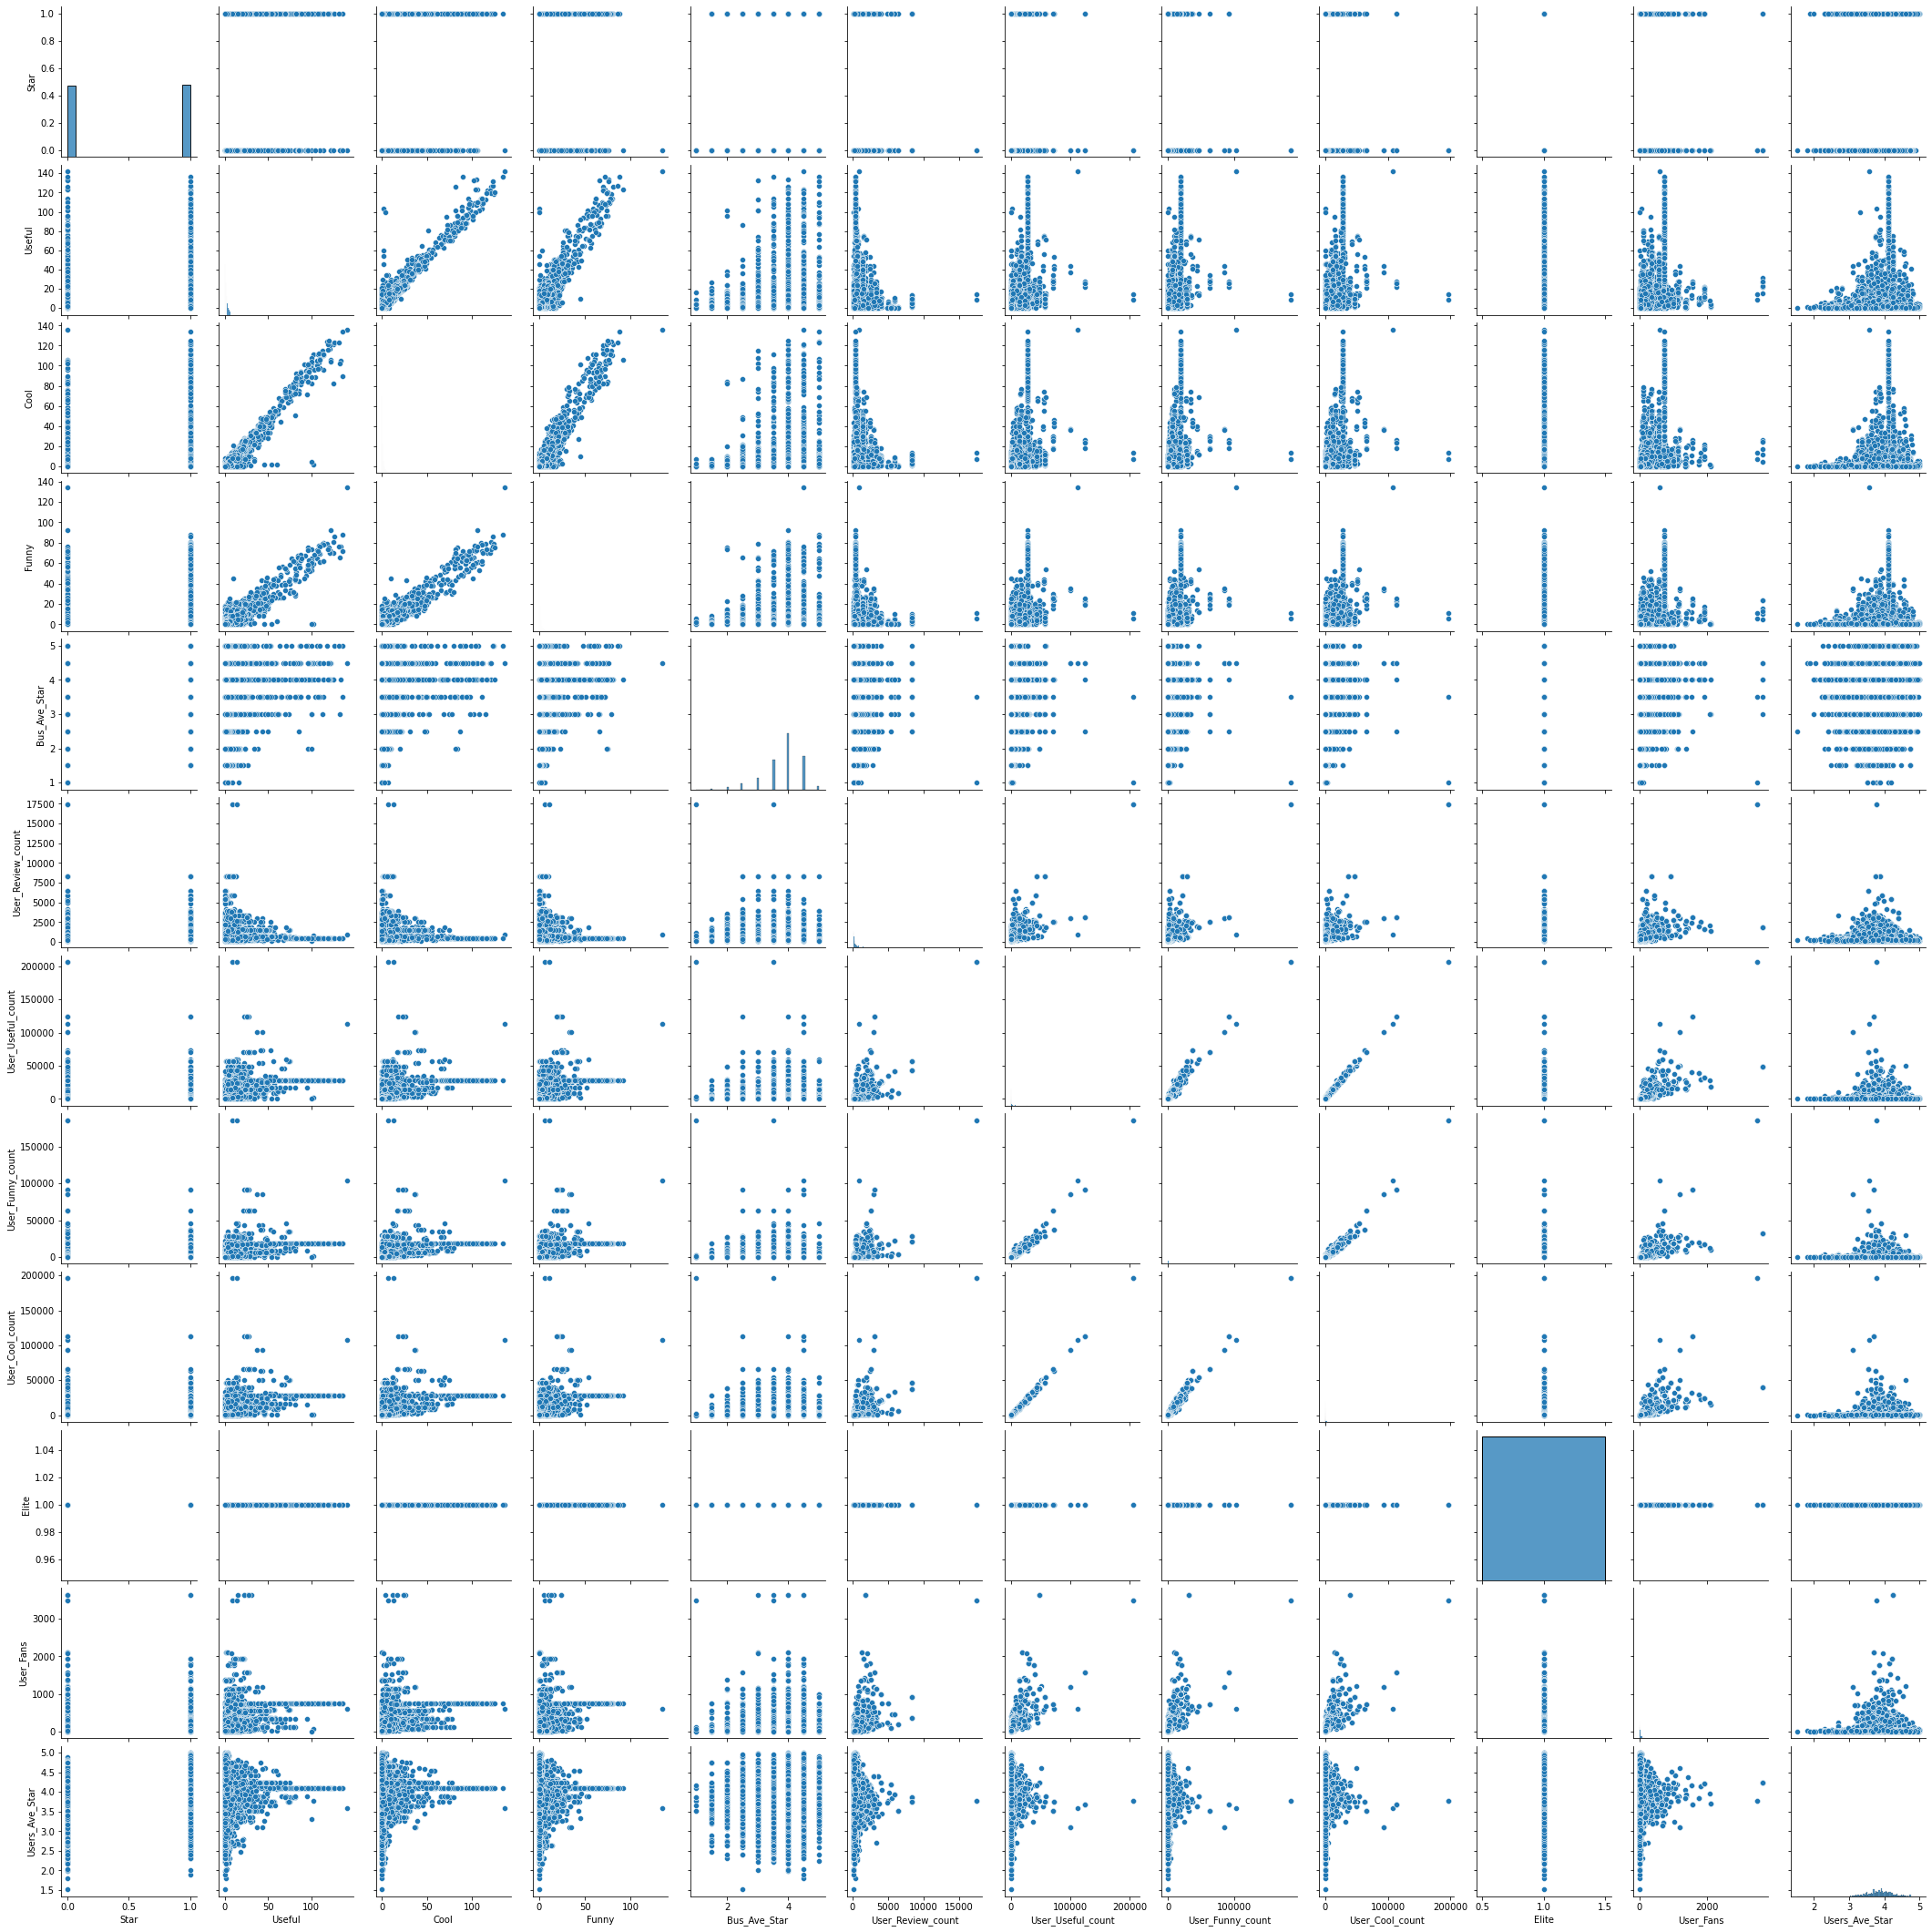

In [122]:
sns.pairplot(new_data) #compare all variables against each other

<AxesSubplot:xlabel='Star', ylabel='Count'>

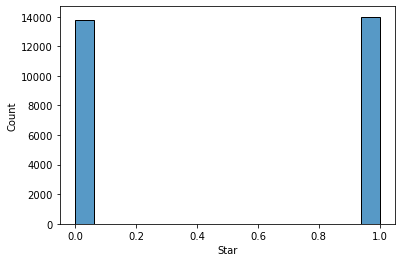

In [10]:
sns.histplot(new_data["Star"])
#pretty even star distribution

<AxesSubplot:xlabel='Bus_Ave_Star', ylabel='Count'>

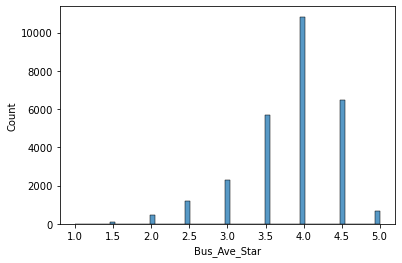

In [11]:
sns.histplot(new_data["Bus_Ave_Star"]) #Business average stars matches users average given stars overall

<AxesSubplot:xlabel='Users_Ave_Star', ylabel='Count'>

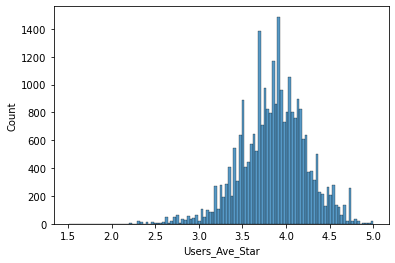

In [12]:
sns.histplot(new_data["Users_Ave_Star"])

### IGNORE THIS BELOW ---------------------------------------------------------------------------------------------

In [13]:
#Running a regression on review and stars, takes long
#X = new_data["Review"]
#y = new_data["Star"]

#cv = CountVectorizer()
#X = cv.fit_transform(X)


In [203]:
#X_train, X_test, y_train, y_test = train_test_split(
         #X, y, test_size=0.20, random_state = 2021)

#model = LinearRegression()
#model.fit(X_train, y_train)
#predict = model.predict(X_test)
#print(classification_report(y_test, predict))

In [204]:
#model.score(X_train, y_train)

0.9998168744743574

In [205]:
#model.coef_

array([-0.35055555,  2.04569939,  2.22862156, ...,  2.24509447,
        0.39001328, -0.26872884])

### -------------------------------------------------------------------------------------------------------------------------------

### Correlation heatmap

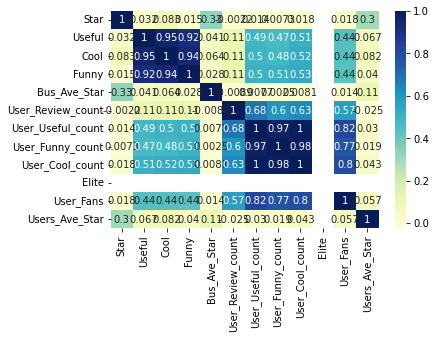

In [14]:
dataplot = sns.heatmap(new_data.corr(), cmap="YlGnBu", annot=True)

In [15]:
#IGNORE THIS CHUNK
#map star into 0 and 1 and balance the data, dont need with new dataset
#recode = {
    #1.0:0,
   # 2.0:0,
    #3.0:0,
   # 4.0:1,
    #5.0:1
#}

#new_data['Star_1'] = new_data['Star'].map(recode)
#new_data.head(4)

#new_data.groupby("Star_1").count()

### Making sure our data was balanced

In [6]:
new_data.groupby("Star").count()

,Useful,Cool,Funny,Review,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star
Star,,,,,,,,,,,,
0,13802,13802,13802,13802,13802,13802,13802,13802,13802,13802,13802,13802
1,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000,14000


# Text Mining -------------------------------------------------------------------

### Clean Review column and prep for further analysis (lower case, no prepositions, etc...) ------------------

In [7]:
new_data["Review"] = new_data["Review"].str.lower()
new_data.head(4)

,Star,Useful,Cool,Funny,Review,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star
0,0,5,0,0,this was a tough one! on the merits of the w...,4.0,431,2126,1245,1476,1,76,4.05
1,0,0,1,0,stayed here for a bachelorette party. this pla...,3.5,471,693,183,218,1,41,3.53
2,0,1,0,0,a laid back bar for the college crowd. cheap d...,2.5,2604,4329,1730,2846,1,183,4.11
3,0,9,6,4,not bad. sushi roll was good but options were ...,3.5,297,558,206,267,1,29,3.70


In [8]:
regexp = RegexpTokenizer('\w+')

In [9]:
new_data["token_review"] = new_data["Review"].apply(regexp.tokenize)
new_data.head(4)

,Star,Useful,Cool,Funny,Review,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star,token_review
0,0,5,0,0,this was a tough one! on the merits of the w...,4.0,431,2126,1245,1476,1,76,4.05,"[this, was, a, tough, one, on, the, merits, of..."
1,0,0,1,0,stayed here for a bachelorette party. this pla...,3.5,471,693,183,218,1,41,3.53,"[stayed, here, for, a, bachelorette, party, th..."
2,0,1,0,0,a laid back bar for the college crowd. cheap d...,2.5,2604,4329,1730,2846,1,183,4.11,"[a, laid, back, bar, for, the, college, crowd,..."
3,0,9,6,4,not bad. sushi roll was good but options were ...,3.5,297,558,206,267,1,29,3.70,"[not, bad, sushi, roll, was, good, but, option..."


In [10]:
stopwords = nltk.corpus.stopwords.words("english")
new_data['token_review'] = new_data['token_review'].apply(lambda x: [item for item in x if item not in stopwords])
new_data.head(4)

,Star,Useful,Cool,Funny,Review,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star,token_review
0,0,5,0,0,this was a tough one! on the merits of the w...,4.0,431,2126,1245,1476,1,76,4.05,"[tough, one, merits, wine, fairly, average, un..."
1,0,0,1,0,stayed here for a bachelorette party. this pla...,3.5,471,693,183,218,1,41,3.53,"[stayed, bachelorette, party, place, got, job,..."
2,0,1,0,0,a laid back bar for the college crowd. cheap d...,2.5,2604,4329,1730,2846,1,183,4.11,"[laid, back, bar, college, crowd, cheap, drink..."
3,0,9,6,4,not bad. sushi roll was good but options were ...,3.5,297,558,206,267,1,29,3.70,"[bad, sushi, roll, good, options, limited, hib..."


In [11]:
new_data['review_string'] = new_data['token_review'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
new_data.head(4)

,Star,Useful,Cool,Funny,Review,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star,token_review,review_string
0,0,5,0,0,this was a tough one! on the merits of the w...,4.0,431,2126,1245,1476,1,76,4.05,"[tough, one, merits, wine, fairly, average, un...",tough one merits wine fairly average understan...
1,0,0,1,0,stayed here for a bachelorette party. this pla...,3.5,471,693,183,218,1,41,3.53,"[stayed, bachelorette, party, place, got, job,...",stayed bachelorette party place got job done u...
2,0,1,0,0,a laid back bar for the college crowd. cheap d...,2.5,2604,4329,1730,2846,1,183,4.11,"[laid, back, bar, college, crowd, cheap, drink...",laid back bar college crowd cheap drinks proje...
3,0,9,6,4,not bad. sushi roll was good but options were ...,3.5,297,558,206,267,1,29,3.70,"[bad, sushi, roll, good, options, limited, hib...",bad sushi roll good options limited hibachi gr...


In [12]:
all_words = ' '.join([word for word in new_data['review_string']])

In [13]:
token_words = nltk.tokenize.word_tokenize(all_words)

In [14]:
word_freq = FreqDist(token_words)
word_freq

FreqDist({'good': 18785, 'place': 16454, 'food': 15444, 'like': 13382, 'one': 11713, 'great': 11597, 'get': 10342, 'really': 9855, 'service': 9441, 'would': 9422, ...})

In [15]:
new_data['text_string_fdist'] = new_data['token_review'].apply(lambda x: ' '.join([item for item in x if word_freq[item] >= 0 ]))
#based on top 10 words

In [16]:
new_data.head(4) 

,Star,Useful,Cool,Funny,Review,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star,token_review,review_string,text_string_fdist
0,0,5,0,0,this was a tough one! on the merits of the w...,4.0,431,2126,1245,1476,1,76,4.05,"[tough, one, merits, wine, fairly, average, un...",tough one merits wine fairly average understan...,tough one merits wine fairly average understan...
1,0,0,1,0,stayed here for a bachelorette party. this pla...,3.5,471,693,183,218,1,41,3.53,"[stayed, bachelorette, party, place, got, job,...",stayed bachelorette party place got job done u...,stayed bachelorette party place got job done u...
2,0,1,0,0,a laid back bar for the college crowd. cheap d...,2.5,2604,4329,1730,2846,1,183,4.11,"[laid, back, bar, college, crowd, cheap, drink...",laid back bar college crowd cheap drinks proje...,laid back bar college crowd cheap drinks proje...
3,0,9,6,4,not bad. sushi roll was good but options were ...,3.5,297,558,206,267,1,29,3.70,"[bad, sushi, roll, good, options, limited, hib...",bad sushi roll good options limited hibachi gr...,bad sushi roll good options limited hibachi gr...


In [17]:
wordnet_lem = WordNetLemmatizer()

In [18]:
new_data['review_string_lem'] = new_data['text_string_fdist'].apply(wordnet_lem.lemmatize)
new_data.head(4)

,Star,Useful,Cool,Funny,Review,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star,token_review,review_string,text_string_fdist,review_string_lem
0,0,5,0,0,this was a tough one! on the merits of the w...,4.0,431,2126,1245,1476,1,76,4.05,"[tough, one, merits, wine, fairly, average, un...",tough one merits wine fairly average understan...,tough one merits wine fairly average understan...,tough one merits wine fairly average understan...
1,0,0,1,0,stayed here for a bachelorette party. this pla...,3.5,471,693,183,218,1,41,3.53,"[stayed, bachelorette, party, place, got, job,...",stayed bachelorette party place got job done u...,stayed bachelorette party place got job done u...,stayed bachelorette party place got job done u...
2,0,1,0,0,a laid back bar for the college crowd. cheap d...,2.5,2604,4329,1730,2846,1,183,4.11,"[laid, back, bar, college, crowd, cheap, drink...",laid back bar college crowd cheap drinks proje...,laid back bar college crowd cheap drinks proje...,laid back bar college crowd cheap drinks proje...
3,0,9,6,4,not bad. sushi roll was good but options were ...,3.5,297,558,206,267,1,29,3.70,"[bad, sushi, roll, good, options, limited, hib...",bad sushi roll good options limited hibachi gr...,bad sushi roll good options limited hibachi gr...,bad sushi roll good options limited hibachi gr...


In [19]:
new_data['is_equal']= (new_data['text_string_fdist']==new_data['review_string_lem'])
new_data.head(4)

,Star,Useful,Cool,Funny,Review,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star,token_review,review_string,text_string_fdist,review_string_lem,is_equal
0,0,5,0,0,this was a tough one! on the merits of the w...,4.0,431,2126,1245,1476,1,76,4.05,"[tough, one, merits, wine, fairly, average, un...",tough one merits wine fairly average understan...,tough one merits wine fairly average understan...,tough one merits wine fairly average understan...,True
1,0,0,1,0,stayed here for a bachelorette party. this pla...,3.5,471,693,183,218,1,41,3.53,"[stayed, bachelorette, party, place, got, job,...",stayed bachelorette party place got job done u...,stayed bachelorette party place got job done u...,stayed bachelorette party place got job done u...,True
2,0,1,0,0,a laid back bar for the college crowd. cheap d...,2.5,2604,4329,1730,2846,1,183,4.11,"[laid, back, bar, college, crowd, cheap, drink...",laid back bar college crowd cheap drinks proje...,laid back bar college crowd cheap drinks proje...,laid back bar college crowd cheap drinks proje...,True
3,0,9,6,4,not bad. sushi roll was good but options were ...,3.5,297,558,206,267,1,29,3.70,"[bad, sushi, roll, good, options, limited, hib...",bad sushi roll good options limited hibachi gr...,bad sushi roll good options limited hibachi gr...,bad sushi roll good options limited hibachi gr...,True


In [20]:
new_data.is_equal.value_counts()

True    27802
Name: is_equal, dtype: int64

In [21]:
new_data.shape #all the same

(27802, 18)

### ------------------------------------------------------------------------------------ End of review cleaning

# Most used words ------------------------------------------------------

In [22]:
all_words_lem = ' '.join([word for word in new_data['review_string_lem']])

(-0.5, 599.5, 399.5, -0.5)

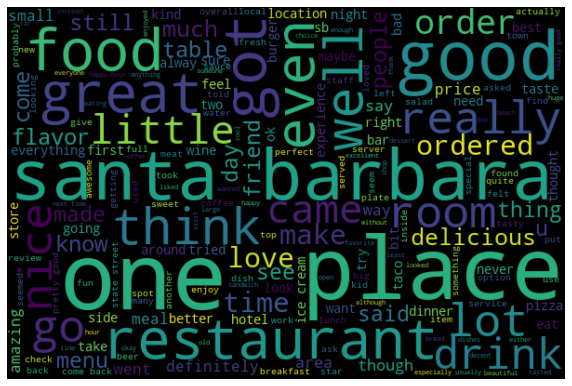

In [23]:
wordcloud = WordCloud(width = 600,
                     height = 400,
                     random_state = 2021, 
                     max_font_size = 100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [24]:
#word frequency
words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

In [25]:
fd.most_common

<bound method Counter.most_common of FreqDist({'good': 18785, 'place': 16454, 'food': 15444, 'like': 13382, 'one': 11713, 'great': 11597, 'get': 10342, 'really': 9855, 'service': 9441, 'would': 9422, ...})>

<AxesSubplot:>

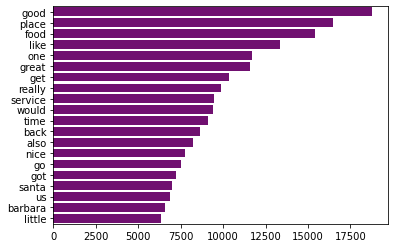

In [26]:
top10 = fd.most_common(20)
fdist = pd.Series(dict(top10))

sns.barplot(y = fdist.index, x = fdist.values, color = "purple")

# Sentiment Analysis ------------------------------------------------------------

In [27]:
analyzer = SentimentIntensityAnalyzer()

In [28]:
new_data['polarity'] = new_data['review_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
new_data.tail(3)

,Star,Useful,Cool,Funny,Review,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star,token_review,review_string,text_string_fdist,review_string_lem,is_equal,polarity
27799,1,3,0,0,historic charm with all your favorite modern a...,3.5,1413,23000,13130,18667,1,827,4.10,"[historic, charm, favorite, modern, amenities,...",historic charm favorite modern amenities plus ...,historic charm favorite modern amenities plus ...,historic charm favorite modern amenities plus ...,True,"{'neg': 0.087, 'neu': 0.694, 'pos': 0.219, 'co..."
27800,1,2,1,0,i prefer to visit when a crowd is barely visib...,3.0,347,640,324,695,1,23,4.08,"[prefer, visit, crowd, barely, visible, juke, ...",prefer visit crowd barely visible juke box mus...,prefer visit crowd barely visible juke box mus...,prefer visit crowd barely visible juke box mus...,True,"{'neg': 0.086, 'neu': 0.824, 'pos': 0.09, 'com..."
27801,1,0,0,0,"we popped in after training for dinner, after ...",4.5,298,374,115,266,1,15,4.60,"[popped, training, dinner, hearing, indian, cu...",popped training dinner hearing indian cuisine ...,popped training dinner hearing indian cuisine ...,popped training dinner hearing indian cuisine ...,True,"{'neg': 0.076, 'neu': 0.542, 'pos': 0.382, 'co..."


In [29]:
new_data_1 = pd.concat(
    [new_data.drop(['polarity'], axis=1), 
     new_data['polarity'].apply(pd.Series)], axis=1)
new_data_1.head(3)

,Star,Useful,Cool,Funny,Review,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,...,Users_Ave_Star,token_review,review_string,text_string_fdist,review_string_lem,is_equal,neg,neu,pos,compound
0,0,5,0,0,this was a tough one! on the merits of the w...,4.0,431,2126,1245,1476,...,4.05,"[tough, one, merits, wine, fairly, average, un...",tough one merits wine fairly average understan...,tough one merits wine fairly average understan...,tough one merits wine fairly average understan...,True,0.087,0.599,0.314,0.9896
1,0,0,1,0,stayed here for a bachelorette party. this pla...,3.5,471,693,183,218,...,3.53,"[stayed, bachelorette, party, place, got, job,...",stayed bachelorette party place got job done u...,stayed bachelorette party place got job done u...,stayed bachelorette party place got job done u...,True,0.080,0.727,0.193,0.9632
2,0,1,0,0,a laid back bar for the college crowd. cheap d...,2.5,2604,4329,1730,2846,...,4.11,"[laid, back, bar, college, crowd, cheap, drink...",laid back bar college crowd cheap drinks proje...,laid back bar college crowd cheap drinks proje...,laid back bar college crowd cheap drinks proje...,True,0.000,1.000,0.000,0.0000


In [30]:
new_data_1['sentiment'] = new_data_1['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
new_data_1.head(4)

,Star,Useful,Cool,Funny,Review,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,...,token_review,review_string,text_string_fdist,review_string_lem,is_equal,neg,neu,pos,compound,sentiment
0,0,5,0,0,this was a tough one! on the merits of the w...,4.0,431,2126,1245,1476,...,"[tough, one, merits, wine, fairly, average, un...",tough one merits wine fairly average understan...,tough one merits wine fairly average understan...,tough one merits wine fairly average understan...,True,0.087,0.599,0.314,0.9896,positive
1,0,0,1,0,stayed here for a bachelorette party. this pla...,3.5,471,693,183,218,...,"[stayed, bachelorette, party, place, got, job,...",stayed bachelorette party place got job done u...,stayed bachelorette party place got job done u...,stayed bachelorette party place got job done u...,True,0.080,0.727,0.193,0.9632,positive
2,0,1,0,0,a laid back bar for the college crowd. cheap d...,2.5,2604,4329,1730,2846,...,"[laid, back, bar, college, crowd, cheap, drink...",laid back bar college crowd cheap drinks proje...,laid back bar college crowd cheap drinks proje...,laid back bar college crowd cheap drinks proje...,True,0.000,1.000,0.000,0.0000,neutral
3,0,9,6,4,not bad. sushi roll was good but options were ...,3.5,297,558,206,267,...,"[bad, sushi, roll, good, options, limited, hib...",bad sushi roll good options limited hibachi gr...,bad sushi roll good options limited hibachi gr...,bad sushi roll good options limited hibachi gr...,True,0.085,0.679,0.235,0.8591,positive


### Visualization of word sentiment

<AxesSubplot:xlabel='count', ylabel='sentiment'>

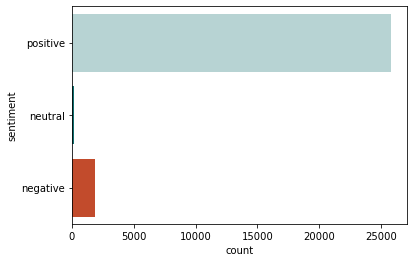

In [31]:
sns.countplot(y='sentiment', 
             data=new_data_1, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             )

<AxesSubplot:xlabel='sentiment', ylabel='compound'>

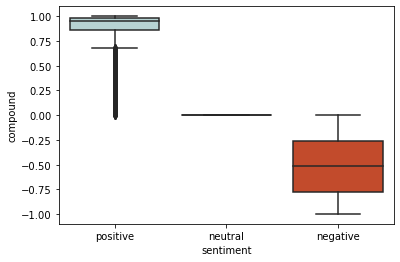

In [32]:
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=new_data_1)

### Most Positive and Negative Review

In [33]:
new_data_1.loc[new_data_1['compound'].idxmax()].values

array([1, 19, 17, 8,
       'yankee noodle is fabulous! i love the open concept, communal tables, innovative cocktails, great customer service and the asian fusion food! as expected in the beginning stages on any restaurant, yankee noodle seems to still be fine tuning what to offer on their menu as it has changed several times since opening, so i am going to write about all my faves (although some items may no longer be on the menu) but who knows, maybe they\'ll bring them back! \r\n\r\nwhen i think of yankee noodle, my brain immediately recalls they\'re pork tonkotsu ramen. i had it on my second visit to yn, a couple of weeks after opening, and it was literally the best pork tonkotsu ramen that i have ever had. i lived in san diego, hawaii, los angeles and now, santa barbara, and no broth hit me like this broth. it was incredibly rich, gelatinous and savory - so good! as i ate it, i could feel my abdomen bloat up from all its\' perfectly, salty deliciousness. i ordered the ramen as is

In [34]:
new_data_1.loc[new_data_1['compound'].idxmin()].values

array([0, 6, 0, 5,
       'the dirtbags here treat the desire for kindness like a criminal offense. i hate avs and think the owners should be sued for crimes against humanity and animal cruelty.\r\n\r\ni regret that i needed to bring my pet in here under the most dire and heartbreaking of circumstances. i think "dr." danika rahn must be a sociopath. she yelled at me and delivered totally heartbreaking news is the most cruel way. i made the very reasonable request that she be more gentle in her delivery and that her bedside manner was harsh. what happened next completely blew my mind as far as evil behaviors from heartless practitioners. shortly after, while i was trying to decide on treatment for my pet with "dr." rahn in the room, "dr." andrea wells barged in while i was speaking to "dr." rahn. "dr." wells was accompanied by a male medical assistant. she refused to talk to me alone after i asked to speak to her privately to address her outrageouly unprofessional eavesdropping and barg

# Random Forest ------------------------------------------------------------------

In [34]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Variable Selection

In [35]:
y, X = dmatrices('Star ~ Useful+Cool+Funny+Bus_Ave_Star+User_Review_count+User_Funny_count+User_Useful_count+User_Cool_count+Elite+User_Fans+Users_Ave_Star',
                 data=new_data, return_type='dataframe')

In [36]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns


C:\Users\celes\anaconda2\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [37]:
vif

,VIF,variable
0,0.000000,Intercept
1,12.044432,Useful
2,17.242047,Cool
3,10.599030,Funny
4,1.027176,Bus_Ave_Star
5,3.319222,User_Review_count
6,33.642770,User_Funny_count
7,250.032400,User_Useful_count
8,292.633640,User_Cool_count
9,0.000000,Elite


In [38]:
df = new_data.drop(['Useful','Cool','Funny','User_Useful_count','User_Cool_count'], axis = 1)
# dropping high collinearity variables

In [39]:
useful = ['Star', 'Bus_Ave_Star', 'User_Review_count','Elite', 'User_Fans', 'Users_Ave_Star']

df = df[useful]

In [40]:
df #check

,Star,Bus_Ave_Star,User_Review_count,Elite,User_Fans,Users_Ave_Star
0,0,4.0,431,1,76,4.05
1,0,3.5,471,1,41,3.53
2,0,2.5,2604,1,183,4.11
3,0,3.5,297,1,29,3.70
4,0,3.5,315,1,21,3.71
...,...,...,...,...,...,...
27797,1,4.0,188,1,3,4.32
27798,1,3.5,178,1,5,4.51
27799,1,3.5,1413,1,827,4.10
27800,1,3.0,347,1,23,4.08


### Splitting the data

In [41]:
x = df.drop("Star", axis = 1)
y = df["Star"]

In [42]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.20, random_state = 2021)

### Fitting the Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
  
 # create regressor object
regressor = RandomForestClassifier(n_estimators = 1000, random_state = 2021, criteria = "gini")
  
# fit the regressor with x and y data
regressor.fit(train_x, train_y)
regressor.score(train_x, train_y) # mean accuracy

0.8564363113169372

In [84]:
regressor.fit(test_x, test_y)
regressor.score(test_x, test_y) #mean accuracy

0.9176407121021399

In [121]:
y_predicted = regressor.predict(test_x)

In [122]:
from sklearn import metrics
metrics.confusion_matrix(test_y, y_predicted)

array([[2486,  251],
       [ 207, 2617]], dtype=int64)

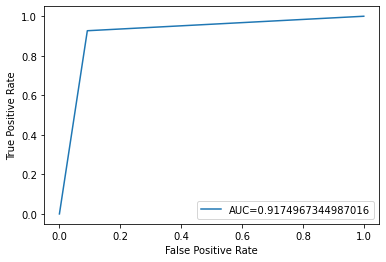

In [132]:
fpr, tpr, _ = metrics.roc_curve(test_y,  y_predicted)
auc = metrics.roc_auc_score(test_y, y_predicted)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Variable Importance

In [93]:
importances = list(regressor.feature_importances_)


In [110]:
data = pd.Series(importances, index = list(x)).sort_values(ascending=False)

In [116]:
data

Users_Ave_Star       0.323182
User_Review_count    0.289327
User_Fans            0.232681
Bus_Ave_Star         0.154809
Elite                0.000000
dtype: float64

[Text(0.5, 0, 'Importance'), Text(0.5, 1.0, 'Variable Importance')]

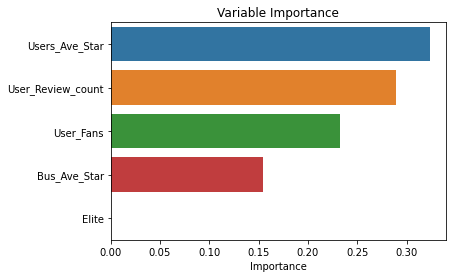

In [136]:
fgrid = sns.barplot(x = data, y = data.index)
fgrid.set(xlabel = "Importance", title = "Variable Importance")